In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os

def work_space(path):
    while True:
        if os.path.split(path)[1] != "BoxAnalysis":
            path = os.path.split(path)[0]
        else:
            return path.replace("\\", "/")
work_dir = work_space(os.getcwd())

data_path = work_dir + "/DataFiles/"
filenames = os.listdir(data_path)
data_files = [data_path + data_file for data_file in filenames]


def file_analysis(data_file, fname, lower, upper, topnum):
    a = 1.4662732396997913
    
    with open(data_file, mode = 'r') as f:
        channels = []
        contents = []
        
        Nhead = 7
        print("Data in the first ", Nhead," lines of the file: ", fname)
        for i in range(Nhead):
             line = f.readline()
             print(line, end = " ")
             
        Nchans = 0
        for line in f:
             channel, energy, content = line.split(", ")
             channels.append(float(channel))
             contents.append(float(content))
             Nchans += 1
        
        print("Amount of Channels in Spectrum: ", Nchans)
    f.close()

    energies = np.array(channels) * a
    
    
    # Integrere innhold i Nomr omrÃ¥der mellom nedre[i] og ovre[i] grenser
    TotalContent = [0 for i in range(topnum)]
    Average = [0 for i in range(topnum)]
    merketx = []
    merkety = []
    SumSquare = [0 for i in range(topnum)]
    StandDev = [0 for i in range(topnum)]
    SSUnc = [0 for i in range(topnum)]
    
    for i in range(topnum):
        TotalContent[i] = np.sum(contents[lower[i]:upper[i]])
        Average[i] = np.sum(np.array(energies) * np.array(contents)) / TotalContent[i]
        SumSquare[i] = np.sum(np.array(energies) ** 2 * np.array(contents))
        merketx.append([energies[index] for index in range(int(lower[i]), int(upper[i]))])
        merkety.append([contents[index] for index in range(int(lower[i]), int(upper[i]))])
        
        StandDev[i] = np.sqrt((TotalContent[i] * SumSquare[i] - Average[i] ** 2) / (TotalContent[i] * (TotalContent[i] - 1)))
        SSUnc[i] = StandDev[i] / np.sqrt(TotalContent[i])                   
        
        lower[i] *= a
        upper[i] *= a

        print("Counts between ", np.round(lower[i], 2), " [KeV] and " , np.round(upper[i], 2), " [KeV] are", TotalContent[i])
        print("Average ","%12.3f" % Average[i], " +/- ", "%12.3f" % SSUnc[i])
        print("Standard Deviation in Area ","%12.3f" % StandDev[i])
    
    # Plotting
    style = "seaborn-v0_8-darkgrid"
    plt.style.use(style)
    plt.plot(energies, contents)
    for i in range(topnum):
        plt.plot(merketx[i], merkety[i], markersize = 3.)
        
    plt.xlabel("Energy [KeV]")
    plt.ylabel("Counts")
    plt.title(fname)
    plt.show()

Data in the first  7  lines of the file:  Bakgrunn2022.csv
Start Time, Mon Nov 7 12:54:06 GMT+0100 2022
 Energy calibration,  Offset: 0, Slope: 2, Quadratic: 0
 Live Time (s), 600
 Real Time (s), 600.082092
 Elapsed Computational, 0
 Spectrum
 Channel, Energy (keV), Counts
 Amount of Channels in Spectrum:  1024
Counts between  219.94  [KeV] and  417.89  [KeV] are 1805.0
Average      2396.786  +/-        33.196
Standard Deviation in Area      1410.359
Counts between  579.18  [KeV] and  678.88  [KeV] are 520.0
Average      8319.615  +/-       115.307
Standard Deviation in Area      2629.399


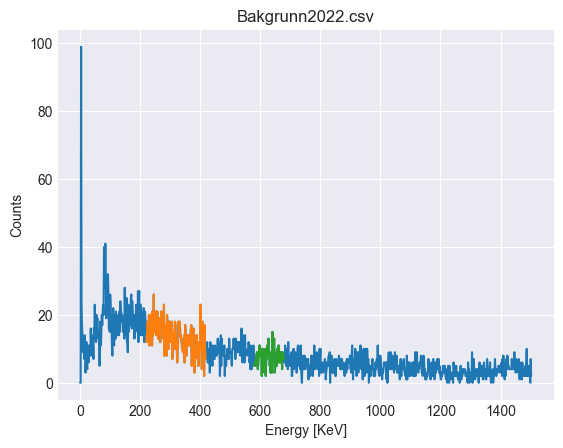

Data in the first  7  lines of the file:  Boks2-2022.csv
Start Time, Mon Nov 7 13:20:18 GMT+0100 2022
 Energy calibration,  Offset: 0, Slope: 2, Quadratic: 0
 Live Time (s), 600
 Real Time (s), 600.13184
 Elapsed Computational, 0
 Spectrum
 Channel, Energy (keV), Counts
 Amount of Channels in Spectrum:  1024
Counts between  219.94  [KeV] and  417.89  [KeV] are 4121.0
Average      1678.024  +/-        17.717
Standard Deviation in Area      1137.357
Counts between  579.18  [KeV] and  678.88  [KeV] are 1121.0
Average      6168.720  +/-        65.153
Standard Deviation in Area      2181.399


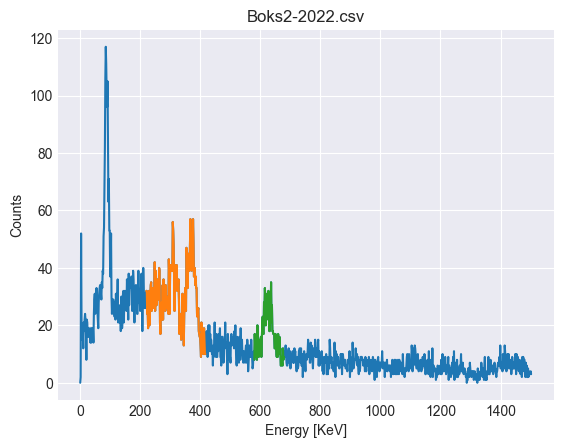

In [9]:
lowers = [[150, 395], [150, 395]]
uppers = [[285, 463], [285, 463]]
topnums = [len(upper) for upper in uppers]

for filename, filedata, lower, upper, topnum in zip(filenames, data_files, lowers, uppers, topnums):
    file_analysis(filedata, filename, lower, upper, topnum)